<a href="https://colab.research.google.com/github/DzawilUqul/CovidClassification-CNN/blob/main/CovidClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

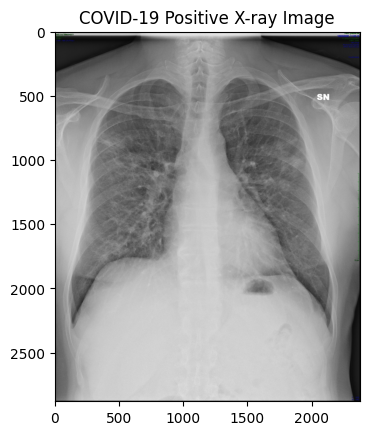

In [ ]:
positive_data_path = "/content/drive/MyDrive/UGM/ComputerVision/COVID-19/Positif/covid-19-caso-70-1-PA.jpg"
plt.title("COVID-19 Positive X-ray Image")
data_positive = plt.imshow(cv2.imread(positive_data_path))

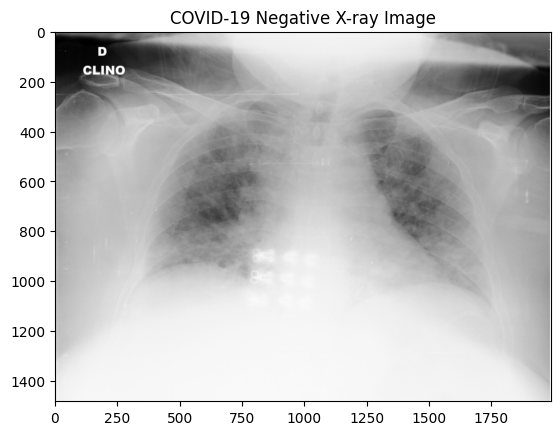

In [ ]:
negative_data_path = "/content/drive/MyDrive/UGM/ComputerVision/COVID-19/Negatif/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg"
plt.title("COVID-19 Negative X-ray Image")
data_negative = plt.imshow(cv2.imread(negative_data_path))

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/UGM/ComputerVision/COVID-19',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 126 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/UGM/ComputerVision/COVID-19", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 30 images belonging to 2 classes.


# CNN

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 50)

Epoch 1/50
4/4 [==============================] - 11s 3s/step - loss: 0.8204 - accuracy: 0.5238 - val_loss: 0.8058 - val_accuracy: 0.3667
Epoch 2/50
4/4 [==============================] - 8s 2s/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.6656 - val_accuracy: 0.6333
Epoch 3/50
4/4 [==============================] - 6s 2s/step - loss: 0.6671 - accuracy: 0.6270 - val_loss: 0.6701 - val_accuracy: 0.6333
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 0.6663 - accuracy: 0.6270 - val_loss: 0.6636 - val_accuracy: 0.6333
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.6564 - accuracy: 0.6270 - val_loss: 0.6658 - val_accuracy: 0.6333
Epoch 6/50
4/4 [==============================] - 6s 2s/step - loss: 0.6391 - accuracy: 0.6270 - val_loss: 0.6705 - val_accuracy: 0.6333
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.6513 - accuracy: 0.6270 - val_loss: 0.6667 - val_accuracy: 0.6333
Epoch 8/50
4/4 [========================

In [ ]:
# serialize weights to HDF5
cnn.save_weights("cnn.h5")

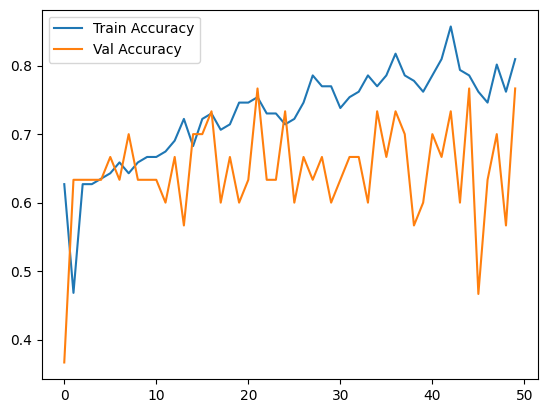

In [ ]:
plt.plot(cnn.history.history['accuracy'], label="Train Accuracy")
plt.plot(cnn.history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.show()

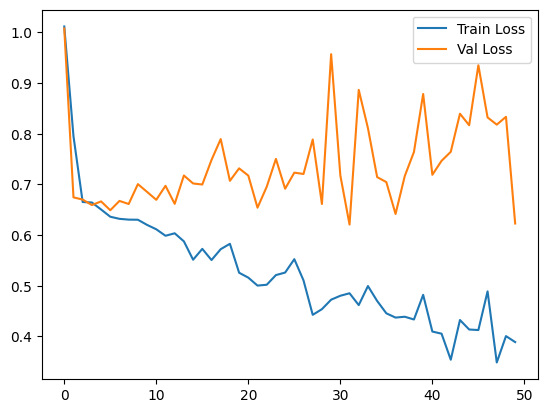

In [ ]:
plt.plot(cnn.history.history['loss'], label="Train Loss")
plt.plot(cnn.history.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()